# Ejercicio con regularizadores

In [121]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [122]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

In [123]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255


print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 784)
(60000,)


In [124]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:49999]
train_labels = train_labels[:49999]


In [156]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
    modelo=models.Sequential()
    # if regularizador<0 or regularizador>4:
      # print('ERROR')
    if regularizador == 0:
      modelo. add (layers. Dense(512, activation='relu',input_shape=(28*28,)))      
    elif regularizador == 1:
      # Regularización L1
      modelo.add(layers.Dense(512,kernel_regularizer= regularizers.l1(0.001),activation='relu',input_shape=(28*28,)))   
    elif regularizador == 2:
      # Regularización L2
      modelo.add(layers.Dense(512,kernel_regularizer= regularizers.l2(0.001),activation='relu',input_shape=(28*28,)))    
    elif regularizador == 3:
      # Regularización simultánea L1 y L2
      modelo.add(layers.Dense(16,kernel_regularizer= regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(28*28,)))
    elif regularizador == 4:
      modelo. add (layers. Dense(512, activation='relu',input_shape=(28*28,)))
      modelo.add(layers.Dropout(0.5))
    else:
      print("ERROR")
      return

    modelo.add(layers.Dense(10, name = 'CapaSalida', activation = 'softmax'))
    modelo.summary()
    return modelo

In [126]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
  return modelo

In [127]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = modelo.fit(train_images, train_labels, 
                       epochs=30, batch_size=128, 
                       validation_data=(validation_images,validation_labels))

  return history

In [128]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'r*', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [129]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [130]:
network0 = crea_modelo(0)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [131]:
network0 = compila_modelo(network0)

In [132]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 5s 12ms/step - loss: 0.2829 - accuracy: 0.9178 - val_loss: 0.1359 - val_accuracy: 0.9608
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 0.1185 - accuracy: 0.9647 - val_loss: 0.1097 - val_accuracy: 0.9667
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0770 - accuracy: 0.9769 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 4/30
391/391 [==============================] - 6s 15ms/step - loss: 0.0548 - accuracy: 0.9841 - val_loss: 0.0787 - val_accuracy: 0.9771
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0412 - accuracy: 0.9878 - val_loss: 0.0733 - val_accuracy: 0.9792
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0311 - accuracy: 0.9911 - val_loss: 0.0809 - val_accuracy: 0.9776
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0699 - val_accuracy: 0.9803

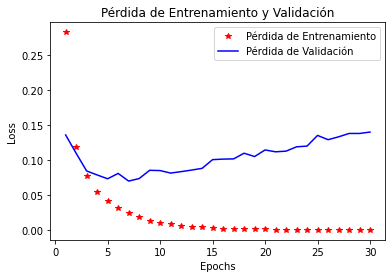

In [133]:
pinta_perdida_entrenamiento_validacion(historia0)

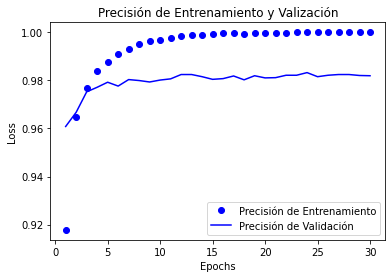

In [134]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [135]:
network1 = crea_modelo(1)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [136]:
network1 = compila_modelo(network1)

In [137]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 2.1430 - accuracy: 0.8446 - val_loss: 1.0348 - val_accuracy: 0.8806
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.9565 - accuracy: 0.8831 - val_loss: 0.8682 - val_accuracy: 0.9012
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.8326 - accuracy: 0.9020 - val_loss: 0.7377 - val_accuracy: 0.9297
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.7559 - accuracy: 0.9152 - val_loss: 0.7187 - val_accuracy: 0.9272
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.7041 - accuracy: 0.9252 - val_loss: 0.6827 - val_accuracy: 0.9289
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.6669 - accuracy: 0.9306 - val_loss: 0.7354 - val_accuracy: 0.9066
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.6378 - accuracy: 0.9369 - val_loss: 0.7024 - val_accuracy: 0.9118

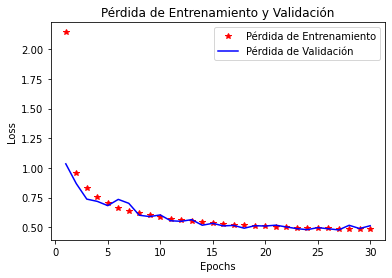

In [138]:
pinta_perdida_entrenamiento_validacion(historia1)

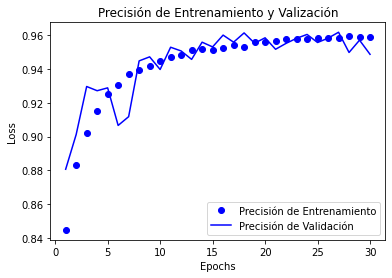

In [139]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [140]:
network2 = crea_modelo(2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [141]:
network2 = compila_modelo(network2)

In [142]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 0.5278 - accuracy: 0.9115 - val_loss: 0.2858 - val_accuracy: 0.9586
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.2641 - accuracy: 0.9540 - val_loss: 0.2182 - val_accuracy: 0.9648
Epoch 3/30
391/391 [==============================] - 5s 14ms/step - loss: 0.2094 - accuracy: 0.9624 - val_loss: 0.1909 - val_accuracy: 0.9666
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1877 - accuracy: 0.9668 - val_loss: 0.1795 - val_accuracy: 0.9687
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1716 - accuracy: 0.9703 - val_loss: 0.1768 - val_accuracy: 0.9685
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1642 - accuracy: 0.9721 - val_loss: 0.1719 - val_accuracy: 0.9695
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1577 - accuracy: 0.9732 - val_loss: 0.1538 - val_accuracy: 0.9750

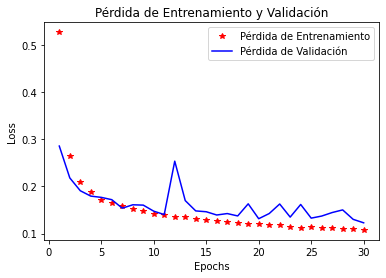

In [143]:
pinta_perdida_entrenamiento_validacion(historia2)

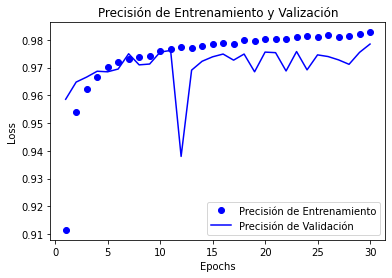

In [144]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [145]:
network3 = crea_modelo(3)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 16)                12560     
                                                                 
 CapaSalida (Dense)          (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [146]:
network3 = compila_modelo(network3)

In [147]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 3ms/step - loss: 1.0160 - accuracy: 0.8155 - val_loss: 0.6454 - val_accuracy: 0.9014
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6317 - accuracy: 0.8936 - val_loss: 0.5574 - val_accuracy: 0.9121
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.5742 - accuracy: 0.9012 - val_loss: 0.5273 - val_accuracy: 0.9110
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.9036 - val_loss: 0.5059 - val_accuracy: 0.9157
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.5222 - accuracy: 0.9052 - val_loss: 0.4833 - val_accuracy: 0.9173
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.5055 - accuracy: 0.9080 - val_loss: 0.4695 - val_accuracy: 0.9180
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.4922 - accuracy: 0.9095 - val_loss: 0.4648 - val_accuracy: 0.9167
Epoch 

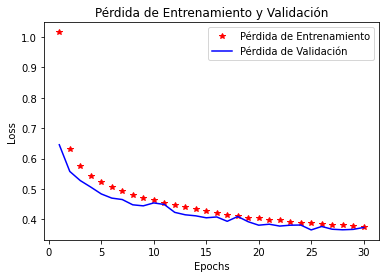

In [148]:
pinta_perdida_entrenamiento_validacion(historia3)

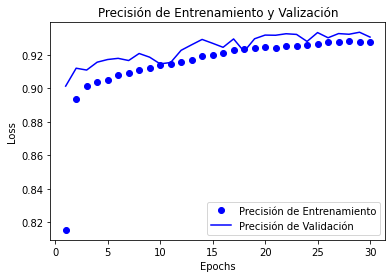

In [149]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [150]:
network4 = crea_modelo(4)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [151]:
network4 = compila_modelo(network4)

In [152]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 6s 14ms/step - loss: 0.3447 - accuracy: 0.8990 - val_loss: 0.1546 - val_accuracy: 0.9575
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1703 - accuracy: 0.9490 - val_loss: 0.1127 - val_accuracy: 0.9675
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1293 - accuracy: 0.9602 - val_loss: 0.0957 - val_accuracy: 0.9725
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1051 - accuracy: 0.9687 - val_loss: 0.0859 - val_accuracy: 0.9741
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.0935 - val_accuracy: 0.9740
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0807 - accuracy: 0.9757 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.0781 - val_accuracy: 0.9784

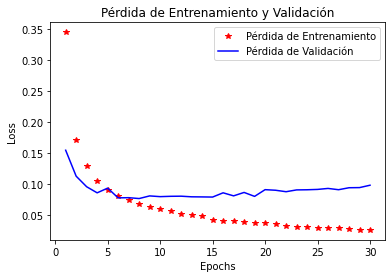

In [153]:
pinta_perdida_entrenamiento_validacion(historia4)

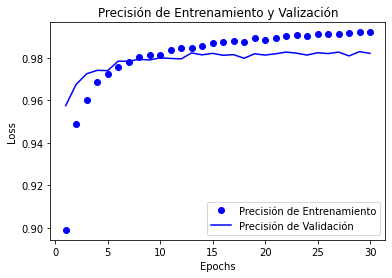

In [154]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [155]:
network5 = crea_modelo(5)

ERROR


### CONCLUSIONES

**¿Qué regularizador funciona mejor?** 

El regulador sirve para evitar el sobreentrenamiento de nuestro modelo.

Para determinar cuál regularizador es mejor con esta base de imágenes tenemos que fijarnos en el *val_accuracy*

*   **Caso 0** La precisión con los datos de entrenamiento (1.000) es mayor a la de precisión  (0.9832) sin aplicar ningún tipo de regularizador. Su pérdida es de 7.1821e-05.

*   **Caso 1** La precisión con los datos de entrenamiento (0.9619) es  mayor a la de precisión (0.9594) aplicando el regularizador l1. Su pérdida es de 0.4819.
*   **Caso 2** La precisión con los datos de entrenamiento (0.9785) es menor a la de precisión (0.9828) aplicando el regularizador l2.Su pérdida es de 0.1076.
*   **Caso 3** La precisión con los datos de entrenamiento (0.9336) es mayor a la de precisión (0.9282) aplicando el regularizador l1_l2.Su pérdida es de 0.0.3758.
*   **Caso 4** La precisión con los datos de entrenamiento (0.9829) es menor a la de precisión (0.9920) con Dropout. Su pérdida es de 0.0.062.

Si tomásemos en cuenta solo aquellos casos que tengas regularizadores se escogería el Caso 4 como el caso más efectivo, es decir, el regularizador con DropOut ya que su máximo valor en *val_accuracy* es el mayor de todos y su pérdida es la menor de todos.




